In [44]:
import numpy as np #for computational purposes
import matplotlib.pyplot as plt
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd #for CSV file I/O, data processing(e.g. pd.read_csv)
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

you are given iris dataset
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file

iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [45]:
# load data (download from the link or from the google drive)
# 1 LINE-------------
from google.colab import files
import io
uploaded = files.upload()

Iris = pd.read_csv(io.BytesIO(uploaded['iris.csv'])) 

Iris.head()

Saving iris.csv to iris (1).csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


for perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
Then, these must be replaced by 0/1 i.e
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1

In [46]:
# 1 LINE-------------
Iris = Iris.head(100)

Iris.shape

(100, 5)

In [48]:
#REPLACE W 0/1
# 1 LINE-------------
Iris = Iris.replace('setosa',0) 
Iris = Iris.replace('versicolor',1)
#Iris

to understand the decision boundary between the two classes, create a scatter plot of the two scores and use color coding to visualize

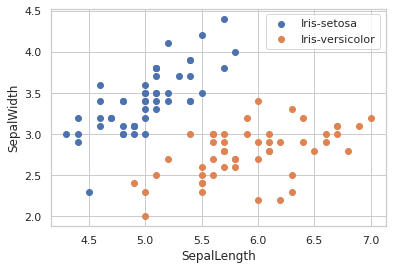

In [49]:
#visualization of given dataset
# ~4 LINES-----------------
plt.scatter(Iris[Iris['species'] == 0]['sepal_length'], Iris[Iris['species'] == 0]['sepal_width'])
plt.scatter(Iris[Iris['species'] == 1]['sepal_length'], Iris[Iris['species'] == 1]['sepal_width'])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend(['Iris-setosa','Iris-versicolor'])
#plt.legend(loc='best')

In [50]:
X = Iris.drop(labels=['species'], axis=1).values #features
Y = np.array(Iris.species.values) #output

print(X.shape)
print(Y.shape)

(100, 4)
(100,)


In [51]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# after setting seed for numpy, randomnly select 80% of the indices under variable train_index and rest under test_index
seed = 5
#1 LINE(SET SEED)-------------


#1 LINE(RANDOM SELECTION)-----------------------------------------------
train_index = np.array(np.random.randint(0,100,80))#CODE HERE

test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [97]:
# train_X = X[train_index]
# train_y = Y[train_index]
# test_X = X[test_index]
# test_y = Y[test_index]

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

train_X.shape, train_y.shape
#train_X, train_y

((80, 4), (80,))

Now implement logistic regression so we can train a model to predict the outcome. Follow below steps:
- Define the model structure (such as number of input features)
- Initialize the model's parameters
- Loop:
    Calculate cost
    Calculate current gradient (backward propagation)
    Update parameters (gradient descent)
    
First complete the sigmoid function required to calculate cost and gradient.

In [106]:
def sigmoid(x):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """   

    # CODE FOR SIGMOID AND RETURN(2 LINES)-------------------------------------
    res = 1/(1 + np.exp(-x))
    return res

In [79]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (1, dim) for w and initializes b to 0.
    Since our example is a very simple one, we will take up initialisation to zero.
    
    Argument:
    dim -- size of the w vector we want (or number of features in iris dataset(here))
    
    Returns:
    w -- initialized vector of shape (1, dim)
    b -- initialized scalar (corresponds to the bias)
    """
    
    # ~2-3 LINES(INITIALIZE AND RETURN)---------------------
    b = 0
    w = np.zeros((1,dim))
    return w,b


implement cost function calc and gradient calc in the same function below

In [110]:
def propagation(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (1,f); *there are 4 features here so f should be 4*
    b -- bias, a scalar
    X -- data of size (number of examples, f)
    Y -- true "label" vector (containing 0 if setosa, 1 if versicolor) of size (number of examples, 1)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. USE np.log(), np.dot()
    """
    
    m = X.shape[0]

    # FORWARD PROPAGATION (FROM X TO COST)
    # Log-likelihood, but with a negative sign, because with gradient descent, we look to minimising the loss function, which in our case is the log-likelihood
    # ~3 LINES--------------------------------------------------------
    
    pred = sigmoid(np.dot(w,X.T) + b)
    #print("pred check ", pred)
    YT = Y.T
    cost = (-1/m)*(np.sum((1-YT)*(np.log(1-pred)) + YT*(np.log(pred))))
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    # 2 LINES(dw,db calc)----------------------------------------------
    db = (1/m)*(np.sum(pred-Y.T))
    dw = (1/m)*(np.dot(X.T, (pred-YT).T))
    
    grads = {"dw": dw,
             "db": db}
    return grads, cost

now complete the optimize function for obtaining optmial parameters of w and b, using gradient descent

In [90]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    """
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- to print the loss every 50 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation( FROM PROPOGATION FUNCITON)
        # 1LINE--------------------------------------------------------
        grad, cost = propagation(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grad["dw"]
        db = grad["db"]
        
        #UPDATE PARAMS
        # 2 LINES------------------------------------------------------
        w = w - (learning_rate * (dw.T))   #w has shape(1,f) while dw has shape(f,1)
        b = b - (learning_rate * db)
        # Record the costs
        if i % 50 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [108]:
def predict(A, m):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    A -- vector containing probabilities
    m -- number of examples
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    Y_prediction = np.zeros((1,m))
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i], ASSUME THRESHOLD=0.5
        # ~4 LINES------------------------------------------------
        if A[0][i] >= 0.5:
          Y_prediction[0][i] = 1
    
    return Y_prediction

In [128]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    """
    Builds the logistic regression model by calling the functions
    
    Arguments:
    X_train -- training set 
    Y_train -- training labels
    X_test -- test set 
    Y_test -- test labels 
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to False to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    n_features = X_train.shape[1]
    print('Number of Features', n_features)
    
    # initialize parameters with zeros
    # 1LINE-----------------------------------------------------
    w,b = initialize_with_zeros(n_features)

    # Gradient descent 
    # 1 linE-----------------------------------------------------------
    parameter, grad, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate)   
    
    # Retrieve parameters w and b from dictionary "parameters" defined in the above line
    #2 lines-----------------------------------------------------------
    w = parameter['w']
    b = parameter['b']

    print('Optimized weights', w)
    print('Optimized intercept',b)
    
    # probability vector using sigmoid of model
    # 2 LINES--------------------------------------------------------------------
    test_pred = sigmoid(np.dot(w,X_test.T) + b)
    train_pred = sigmoid(np.dot(w,X_train.T) + b)
    
    m_tr =  X_train.shape[0]
    m_ts =  X_test.shape[0]
    
    #print(m_tr, m_ts)
    # Get Training Accuracy
    # 1LINE--------------------------------------------------------------
    y_tr_pred = predict(train_pred, m_tr)#code here
    print('Training Accuracy',accuracy_score(y_tr_pred.T, Y_train))

    # Get Testing Accuracy
    # 1LINE----------------------------------------------------------
    y_ts_pred = predict(test_pred, m_ts)#code here
    print('Test Accuracy',accuracy_score(y_ts_pred.T, Y_test)) 
    
    d = {"costs": costs,
         "Y_prediction_test": y_tr_pred, 
         "Y_prediction_train" : y_ts_pred, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

#TRAIN YOUR LOGISTIC REGRESSION MODEL
# 1 LINE (CALL MODEL FUNC)-------------------------------------------------------------------
d = model(train_X, train_y, test_X, test_y,1000,0.01)

Number of Features 4
Cost after iteration 0: 0.693147
Cost after iteration 50: 0.509613
Cost after iteration 100: 0.398902
Cost after iteration 150: 0.323588
Cost after iteration 200: 0.270282
Cost after iteration 250: 0.231111
Cost after iteration 300: 0.201368
Cost after iteration 350: 0.178143
Cost after iteration 400: 0.159575
Cost after iteration 450: 0.144429
Cost after iteration 500: 0.131862
Cost after iteration 550: 0.121281
Cost after iteration 600: 0.112259
Cost after iteration 650: 0.104480
Cost after iteration 700: 0.097707
Cost after iteration 750: 0.091761
Cost after iteration 800: 0.086499
Cost after iteration 850: 0.081811
Cost after iteration 900: 0.077610
Cost after iteration 950: 0.073823
Optimized weights [[-0.2722667  -1.03945902  1.60501353  0.69544273]]
Optimized intercept -0.18758955029116656
Training Accuracy 1.0
Test Accuracy 1.0


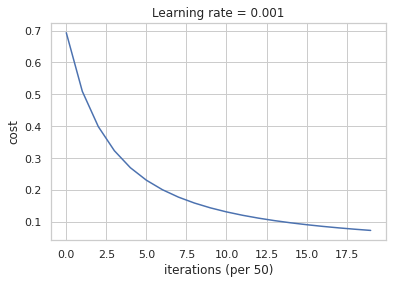

In [129]:
# Plot learning curve (with costs)
# ~5LINES---------------------------------------------------------------------------

plt.plot(d['costs'])
plt.ylabel('cost')
plt.xlabel('iterations (per 50)')
plt.title('Learning rate = 0.001')

plt.show()